In [ ]:
#PROJECT - IMAGE CLASSIFICATION FOR GROCERY STORE
#BY GROUP 4
#PROFESSOR - MARCOS B


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Comment this if the data visualisations doesn't work on your side
%matplotlib inline

plt.style.use('bmh')

In [4]:
df = pd.read_csv('C:/Users/12896/Desktop/GroceryStoreDataset-master/GroceryStoreDataset-master/dataset/classes.csv')
df.head()

,Class Name (str),Class ID (int),Coarse Class Name (str),Coarse Class ID (int),Iconic Image Path (str),Product Description Path (str)
0,Golden-Delicious,0,Apple,0,/iconic-images-and-descriptions/Fruit/Apple/Go...,/iconic-images-and-descriptions/Fruit/Apple/Go...
1,Granny-Smith,1,Apple,0,/iconic-images-and-descriptions/Fruit/Apple/Gr...,/iconic-images-and-descriptions/Fruit/Apple/Gr...
2,Pink-Lady,2,Apple,0,/iconic-images-and-descriptions/Fruit/Apple/Pi...,/iconic-images-and-descriptions/Fruit/Apple/Pi...
3,Red-Delicious,3,Apple,0,/iconic-images-and-descriptions/Fruit/Apple/Re...,/iconic-images-and-descriptions/Fruit/Apple/Re...
4,Royal-Gala,4,Apple,0,/iconic-images-and-descriptions/Fruit/Apple/Ro...,/iconic-images-and-descriptions/Fruit/Apple/Ro...


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 6 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Class Name (str)                81 non-null     object
 1   Class ID (int)                  81 non-null     int64 
 2   Coarse Class Name (str)         81 non-null     object
 3   Coarse Class ID (int)           81 non-null     int64 
 4   Iconic Image Path (str)         81 non-null     object
 5   Product Description Path (str)  81 non-null     object
dtypes: int64(2), object(4)
memory usage: 3.9+ KB


In [12]:
list(set(df.dtypes.tolist()))

[dtype('O'), dtype('int64')]

In [13]:
df_num = df.select_dtypes(include = ['float64', 'int64'])
df_num.head()

,Class ID (int),Coarse Class ID (int)
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0


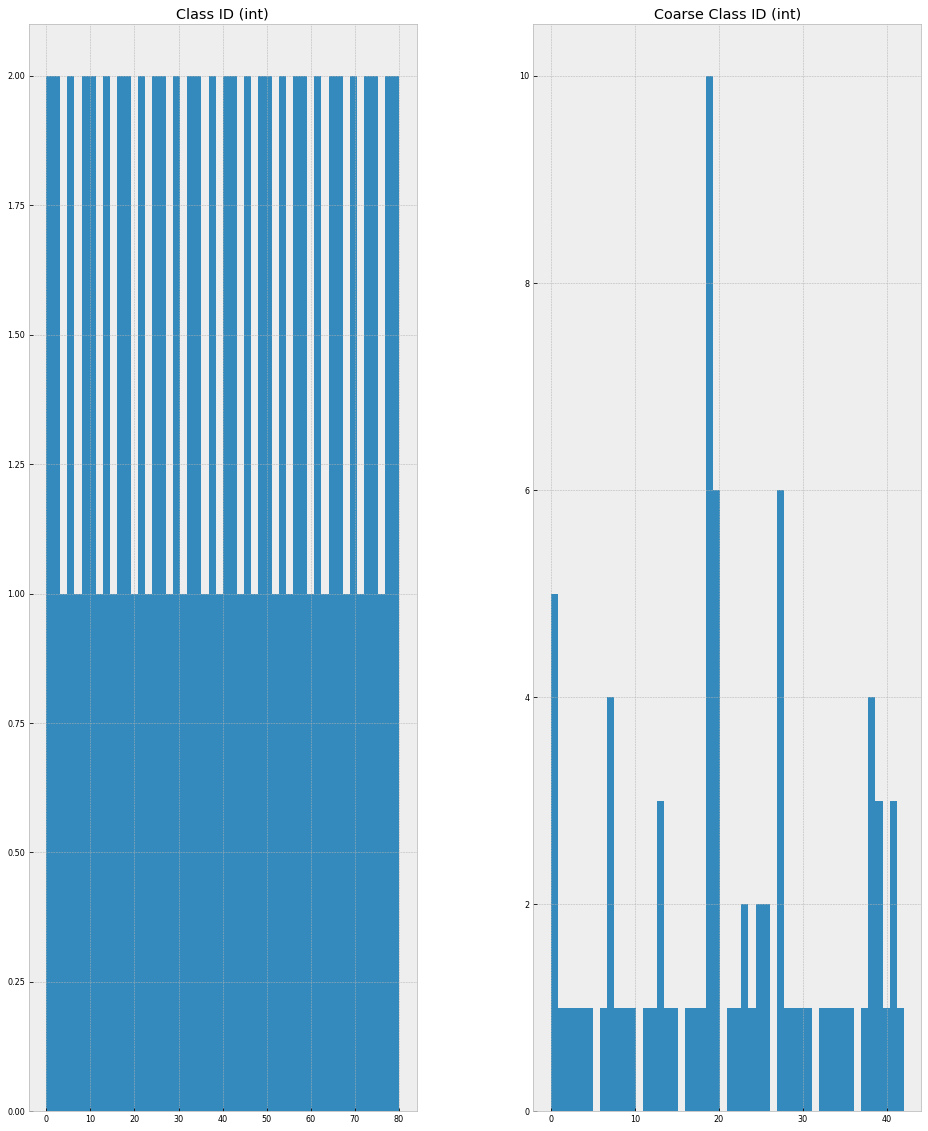

In [14]:
df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8); # ; avoid having the matplotlib verbose informations

In [19]:
df_num_corr = df_num.corr()['Class ID (int)'][:-1] # -1 because the latest row is Coarse Class Id
golden_features_list = df_num_corr[abs(df_num_corr) > 0.5].sort_values(ascending=False)
print("There is {} strongly correlated values with Coarse Class ID (int):\n{}".format(len(golden_features_list), golden_features_list))

There is 1 strongly correlated values with Coarse Class ID (int):
Class ID (int)    1.0
Name: Class ID (int), dtype: float64


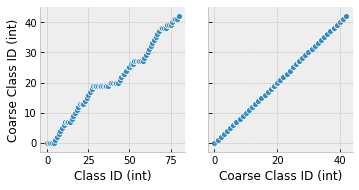

In [20]:
for i in range(0, len(df_num.columns), 5):
    sns.pairplot(data=df_num,
                x_vars=df_num.columns[i:i+5],
                y_vars=['Coarse Class ID (int)'])


In [27]:
import operator

individual_features_df = []
for i in range(0, len(df_num.columns) - 1): # -1 because the last column is Coarse Class Id
    tmpDf = df_num[[df_num.columns[i], 'Coarse Class ID (int)']]
    tmpDf = tmpDf[tmpDf[df_num.columns[i]] != 0]
    individual_features_df.append(tmpDf)

all_correlations = {feature.columns[0]: feature.corr()['Coarse Class ID (int)'][0] for feature in individual_features_df}
all_correlations = sorted(all_correlations.items(), key=operator.itemgetter(1))
for (key, value) in all_correlations:
    print("{:>15}: {:>15}".format(key, value))

 Class ID (int): 0.9900245650261098


In [22]:
golden_features_list = [key for key, value in all_correlations if abs(value) >= 0.5]
print("There is {} strongly correlated values with Coarse Class ID (int):\n{}".format(len(golden_features_list), golden_features_list))

There is 1 strongly correlated values with Coarse Class ID (int):
['Class ID (int)']


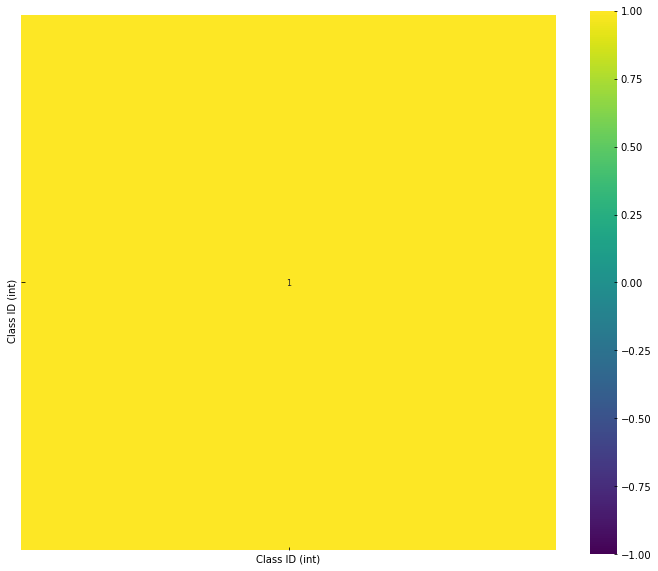

In [25]:
corr = df_num.drop('Coarse Class ID (int)', axis=1).corr() # We already examined SalePrice correlations
plt.figure(figsize=(12, 10))

sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.4)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

In [ ]:
#THIS IS OUR EXPLORATORY DATA ANALYSIS OF THE DATASET THAT WE ARE GOING TO USE FOR OUR PROJECT AND WE MAY ADD OR DELETE SOME OF THE DATA IN FUTURE ACCORDING TO THE PROJECT NEEDS.
#THANK YOU
#GROUP 4